# Pontif√≠cia Universidade Cat√≥lica do Paran√°
## Disciplina: T√©cnicas de Machine Learning
#### Conte√∫do complementar da Semana 2

Aqui, carregarei todas as bibliotecas necess√°rias para trabalharmos neste notebook. Geralmente n√£o h√° problema algum em voc√™ acabar fazendo alguns imports ao longo do notebook, mas confesso que fica melhor se voc√™ organizar todos os seus imports dentro de uma √∫nica c√©lula.

Estarei fazendo alguns coment√°rios (iniciados com `#`) ao lado de cada `import` para lhe explicar para que serve cada biblioteca. Note que voc√™ n√£o √© obrigado a fazer isto para cada biblioteca, mas fa√ßo isto com a inten√ß√£o de lhe explicar. Note que o texto _ap√≥s_ o coment√°rio fica com uma formata√ß√£o diferente: isto serve para que voc√™, ao observar o c√≥digo, j√° consiga visualmente diferenciar o que √© c√≥digo do que n√£o seria um c√≥digo em si.

In [1]:
import pandas as pd # biblioteca para o carregamento de datasets a partir de arquivos em Excel, CSV e outros formatos
import numpy as np # biblioteca para manipula√ß√£o de vetores e matrizes grandes al√©m de outras manipula√ß√µes de dados de larga escala
import matplotlib.cm as mcm # biblioteca para mostrar gr√°ficos (espeficamente uma parte para cores)
import matplotlib.pyplot as plt # biblioteca para mostrar gr√°ficos (espeficamente uma parte para criar gr√°ficos)
import seaborn as sns # outra biblioteca para mostrar gr√°ficos (ela √© especificamente boa para alguns tipos de gr√°ficos, como mapas de calor)

from sklearn.preprocessing import StandardScaler # importando somente o StandardScaler do scikit-learn
from sklearn.datasets import load_wine # importando somente a fun√ß√£o para obtermos o dataset wine (que j√° vem incluso no scikit-learn)
from sklearn.feature_selection import * # importando todas as fun√ß√µes espec√≠ficas de sele√ß√£o de atributos do scikit-learn
from sklearn.decomposition import * # importando todas as fun√ß√µes espec√≠ficas para a extra√ß√£o de atributos do scikit-learn
from sklearn.cluster import * # importando todas as fun√ß√µes espec√≠ficas para o agrupamento

## Dataset do Campeonato Brasileiro (S√©rie A) de 2020

Este dataset serviu para mostrar a import√¢ncia do escalonamento dos dados (isto √©, deix√°-los com uma escala num√©rica similar e compar√°vel) dentro do conte√∫do apresentado. Primeiramente, lemos os dados da tabela do Brasileir√£o os quais est√£o em um arquivo de texto. Voc√™ pode abrir o arquivo dentro do Bloco de Notas ou aplica√ß√£o similar. O separador (isto √©, o que divide os valores) √© o <kbd>Tab</kbd> (tabula√ß√£o).

Viu l√° em cima que usamos o `import pandas as pd` ao inv√©s de `import pandas`? O `as pd` serve para que fa√ßamos chamadas de c√≥digo mais enxutas. Logo, √© mais f√°cil digitar `pd.read_csv` do que `pandas.read_csv`.

Como o separador √© o <kbd>Tab</kbd>, informamos que o separador (`sep`) √© o <kbd>Tab</kbd>. O operador `\t` √© outra forma de nos referirmos √† tecla <kbd>Tab</kbd>. Como sabemos disso? <a href="https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html">Consultando sempre a documenta√ß√£o do Pandas</a>.

In [2]:
df = pd.read_csv('brasileirao.tsv', sep='\t') # lendo o arquivo. O resultado ficar√° no dataframe chamado "df"
df.tail() # o "tail" mostra o final do dataset. Se n√£o colocarmos nada entre os par√™nteses teremos por padr√£o as √∫ltimas 5 linhas.

Equipe  Gols a Favor  Vit√≥rias  Aproveitamento  Derrotas  \
15     Fluminense            55        18              56        10   
16      S√£o Paulo            59        18              58         8   
17    Atl√©tico-MG            64        20              60        10   
18  Internacional            61        20              61         8   
19       Flamengo            68        21              62         9   

    Gols Contra  Empates  Saldo de Gols  Pontos  
15           42       10             13      64  
16           41       12             18      66  
17           45        8             19      68  
18           35       10             26      70  
19           48        8             20      71

### Compara√ß√£o para a normaliza√ß√£o

Aqui, mostrarei dois gr√°ficos: um deles utiliza as colunas `Derrotas` e `Saldo de Gols`.

(-35.0, 25.0)

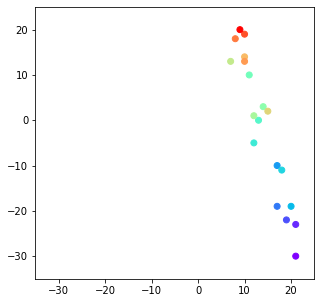

In [3]:
plt.figure(figsize=(5,5)) #criando uma figura com o mesmo tamanho nos dois eixos (isto √©, uma imagem quadrada)
plt.scatter(df['Derrotas'], df['Saldo de Gols'], color=mcm.rainbow(np.linspace(0, 1, 20))) # mostrando um gr√°fico de dispers√£o (scatterplot) onde o eixo x representa os valores da coluna derrotas, o eixo y representa o saldo de gols e, finalmente, colocamos uma escala de cores para as bolinhas. As bolinhas s√£o geradas de acordo com a ordem das linhas no dataframe
plt.xlim((-35,25)) # colocamos uma escala num√©rica para o eixo x (opcional, mas aqui √© importante para vermos as diferentes ordens de grandeza)
plt.ylim((-35,25)) # colocamos uma escala num√©rica para o eixo y (opcional, mas aqui √© importante para vermos as diferentes ordens de grandeza)

Agora, aplicarei o `StandardScaler` para padronizar as duas colunas. No final, mostro o dataset completo. Note que a escala num√©rica dessas duas colunas mudou. Depois, somente rodamos novamente o gr√°fico (agora com os valores j√° padronizados).

In [4]:
df[['Derrotas', 'Saldo de Gols']] = StandardScaler().fit_transform(df[['Derrotas', 'Saldo de Gols']])
df

Equipe  Gols a Favor  Vit√≥rias  Aproveitamento  Derrotas  \
0        Botafogo            32         5              24  1.648929   
1        Coritiba            31         7              27  1.648929   
2           Goi√°s            41         9              32  1.203273   
3           Vasco            37        10              36  0.757616   
4       Fortaleza            34        10              36  0.757616   
5           Sport            31        12              37  1.426101   
6           Bahia            48        12              39  0.980444   
7     Atl√©tico-GO            40        12              44 -0.356525   
8     Corinthians            45        13              45 -0.133697   
9      Bragantino            50        13              46 -0.579353   
10          Cear√°            54        14              46  0.089131   
11         Santos            52        14              47 -0.356525   
12         Gr√™mio            53        14              52 -1.470667   
13   Athletico-PR            38        15              46  0.311960   
14      Palmeiras            51        15              51 -0.802182   
15     Fluminense            55        18              56 -0.802182   
16      S√£o Paulo            59        18              58 -1.247838   
17    Atl√©tico-MG            64        20              60 -0.802182   
18  Internacional            61        20              61 -1.247838   
19       Flamengo            68        21              62 -1.025010   

    Gols Contra  Empates  Saldo de Gols  Pontos  
0            62       12      -1.844626      27  
1            54       10      -1.414214      31  
2            63       10      -1.352726      37  
3            56       11      -1.168263      41  
4            44       11      -0.614875      41  
5            50        6      -1.168263      42  
6            59        8      -0.676363      44  
7            45       14      -0.307438      50  
8            45       12       0.000000      51  
9            40       14       0.614875      53  
10           51       10       0.184463      52  
11           51       12       0.061488      54  
12           40       17       0.799338      59  
13           36        8       0.122975      53  
14           37       13       0.860826      58  
15           42       10       0.799338      64  
16           41       12       1.106776      66  
17           45        8       1.168263      68  
18           35       10       1.598676      70  
19           48        8       1.229751      71

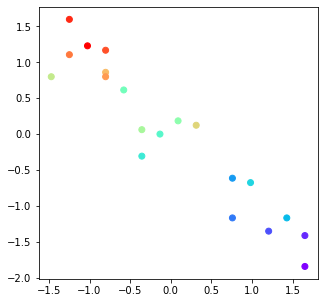

In [5]:
plt.figure(figsize=(5,5))
plt.scatter(df['Derrotas'], df['Saldo de Gols'], color=mcm.rainbow(np.linspace(0, 1, 20)))

## Dataset de vinhos

Este dataset serviu para testarmos algumas t√©cnicas de aprendizagem n√£o-supervisionada. <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine">Ele √© um toy dataset que j√° vem incluso no scikit-learn</a>. Note que possui dois atributos adicionais: `as_frame` (o qual estamos usando para que j√° esteja no formato compat√≠vel com o Pandas, o que ajuda muito na visualiza√ß√£o) e `return_X_y` (o qual retorna dois dados somente: o dataframe com os dados de entrada - ou seja, todas as caracter√≠sticas dos vinhos; e os dados de sa√≠da - ou seja, a classe/label que estamos analisando. Aqui, seriam os tr√™s produtores de vinho. O `display` √© uma fun√ß√£o bem parecida com o `print` do Python, mas que permite uma melhor visualiza√ß√£o dentro do Jupyter.

In [6]:
df_wine, target_wine = load_wine(as_frame=True, return_X_y=True)
display(df_wine.tail())
display(target_wine.tail())

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
173        0.61                  0.52             1.06              7.7  0.64   
174        0.75                  0.43             1.41              7.3  0.70   
175        0.69                  0.43             1.35             10.2  0.59   
176        0.68                  0.53             1.46              9.3  0.60   
177        0.76                  0.56             1.35              9.2  0.61   

     od280/od315_of_diluted_wines  proline  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0

173    2
174    2
175    2
176    2
177    2
Name: target, dtype: int64

## Sele√ß√£o de Atributos
### VarianceThreshold
Aqui testamos diferentes t√©cnicas na mesma base de dados (o `df_wine`). Primeiro, testamos o <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold">VarianceThreshold</a>. Como ele somente retorna uma matriz (lembra na disciplina de Racioc√≠nio Computacional?), perdemos os nomes das colunas. Por outro lado, compare os resultados conforme vamos alterando o `threshold` (limite aceit√°vel).

Ah, e antes que me esque√ßa: o pd.DataFrame cria um novo dataframe (j√° que o VarianceThreshold retorna uma matriz, como comentei) e contendo somente as colunas que importam.

In [7]:
for limite in [0.0, 0.1, 0.5, 0.8, 1.0]:
    display(f'Testando com um threshold de {limite}. Resultado:')
    sel = VarianceThreshold(threshold=limite)
    display(pd.DataFrame(sel.fit_transform(df_wine), columns=df_wine.columns[sel.get_support()]).tail())

'Testando com um threshold de 0.0. Resultado:'

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
173        0.61                  0.52             1.06              7.7  0.64   
174        0.75                  0.43             1.41              7.3  0.70   
175        0.69                  0.43             1.35             10.2  0.59   
176        0.68                  0.53             1.46              9.3  0.60   
177        0.76                  0.56             1.35              9.2  0.61   

     od280/od315_of_diluted_wines  proline  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0

'Testando com um threshold de 0.1. Resultado:'

alcohol  malic_acid  alcalinity_of_ash  magnesium  total_phenols  \
173    13.71        5.65               20.5       95.0           1.68   
174    13.40        3.91               23.0      102.0           1.80   
175    13.27        4.28               20.0      120.0           1.59   
176    13.17        2.59               20.0      120.0           1.65   
177    14.13        4.10               24.5       96.0           2.05   

     flavanoids  proanthocyanins  color_intensity  \
173        0.61             1.06              7.7   
174        0.75             1.41              7.3   
175        0.69             1.35             10.2   
176        0.68             1.46              9.3   
177        0.76             1.35              9.2   

     od280/od315_of_diluted_wines  proline  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0

'Testando com um threshold de 0.5. Resultado:'

alcohol  malic_acid  alcalinity_of_ash  magnesium  flavanoids  \
173    13.71        5.65               20.5       95.0        0.61   
174    13.40        3.91               23.0      102.0        0.75   
175    13.27        4.28               20.0      120.0        0.69   
176    13.17        2.59               20.0      120.0        0.68   
177    14.13        4.10               24.5       96.0        0.76   

     color_intensity  od280/od315_of_diluted_wines  proline  
173              7.7                          1.74    740.0  
174              7.3                          1.56    750.0  
175             10.2                          1.56    835.0  
176              9.3                          1.62    840.0  
177              9.2                          1.60    560.0

'Testando com um threshold de 0.8. Resultado:'

malic_acid  alcalinity_of_ash  magnesium  flavanoids  color_intensity  \
173        5.65               20.5       95.0        0.61              7.7   
174        3.91               23.0      102.0        0.75              7.3   
175        4.28               20.0      120.0        0.69             10.2   
176        2.59               20.0      120.0        0.68              9.3   
177        4.10               24.5       96.0        0.76              9.2   

     proline  
173    740.0  
174    750.0  
175    835.0  
176    840.0  
177    560.0

'Testando com um threshold de 1.0. Resultado:'

malic_acid  alcalinity_of_ash  magnesium  color_intensity  proline
173        5.65               20.5       95.0              7.7    740.0
174        3.91               23.0      102.0              7.3    750.0
175        4.28               20.0      120.0             10.2    835.0
176        2.59               20.0      120.0              9.3    840.0
177        4.10               24.5       96.0              9.2    560.0

Lembra do `StandardScaler` que vimos h√° pouco? Vamos ver como ficaria com exatamente a mesma tabela, mas ap√≥s us√°-lo:

In [8]:
df_wine_scaled = StandardScaler().fit_transform(df_wine)

for limite in [0.0, 0.1, 0.5, 0.8, 1.0]:
    display(f'Testando com um threshold de {limite} (com StandardScaler). Resultado:')
    sel = VarianceThreshold(threshold=limite)
    display(pd.DataFrame(sel.fit_transform(df_wine_scaled), columns=df_wine.columns[sel.get_support()]).tail())

'Testando com um threshold de 0.0 (com StandardScaler). Resultado:'

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
173  0.876275    2.974543  0.305159           0.301803  -0.332922   
174  0.493343    1.412609  0.414820           1.052516   0.158572   
175  0.332758    1.744744 -0.389355           0.151661   1.422412   
176  0.209232    0.227694  0.012732           0.151661   1.422412   
177  1.395086    1.583165  1.365208           1.502943  -0.262708   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
173      -0.985614   -1.424900              1.274310        -0.930179   
174      -0.793334   -1.284344              0.549108        -0.316950   
175      -1.129824   -1.344582              0.549108        -0.422075   
176      -1.033684   -1.354622              1.354888        -0.229346   
177      -0.392751   -1.274305              1.596623        -0.422075   

     color_intensity       hue  od280/od315_of_diluted_wines   proline  
173         1.142811 -1.392758                     -1.231206 -0.021952  
174         0.969783 -1.129518                     -1.485445  0.009893  
175         2.224236 -1.612125                     -1.485445  0.280575  
176         1.834923 -1.568252                     -1.400699  0.296498  
177         1.791666 -1.524378                     -1.428948 -0.595160

'Testando com um threshold de 0.1 (com StandardScaler). Resultado:'

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
173  0.876275    2.974543  0.305159           0.301803  -0.332922   
174  0.493343    1.412609  0.414820           1.052516   0.158572   
175  0.332758    1.744744 -0.389355           0.151661   1.422412   
176  0.209232    0.227694  0.012732           0.151661   1.422412   
177  1.395086    1.583165  1.365208           1.502943  -0.262708   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
173      -0.985614   -1.424900              1.274310        -0.930179   
174      -0.793334   -1.284344              0.549108        -0.316950   
175      -1.129824   -1.344582              0.549108        -0.422075   
176      -1.033684   -1.354622              1.354888        -0.229346   
177      -0.392751   -1.274305              1.596623        -0.422075   

     color_intensity       hue  od280/od315_of_diluted_wines   proline  
173         1.142811 -1.392758                     -1.231206 -0.021952  
174         0.969783 -1.129518                     -1.485445  0.009893  
175         2.224236 -1.612125                     -1.485445  0.280575  
176         1.834923 -1.568252                     -1.400699  0.296498  
177         1.791666 -1.524378                     -1.428948 -0.595160

'Testando com um threshold de 0.5 (com StandardScaler). Resultado:'

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
173  0.876275    2.974543  0.305159           0.301803  -0.332922   
174  0.493343    1.412609  0.414820           1.052516   0.158572   
175  0.332758    1.744744 -0.389355           0.151661   1.422412   
176  0.209232    0.227694  0.012732           0.151661   1.422412   
177  1.395086    1.583165  1.365208           1.502943  -0.262708   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
173      -0.985614   -1.424900              1.274310        -0.930179   
174      -0.793334   -1.284344              0.549108        -0.316950   
175      -1.129824   -1.344582              0.549108        -0.422075   
176      -1.033684   -1.354622              1.354888        -0.229346   
177      -0.392751   -1.274305              1.596623        -0.422075   

     color_intensity       hue  od280/od315_of_diluted_wines   proline  
173         1.142811 -1.392758                     -1.231206 -0.021952  
174         0.969783 -1.129518                     -1.485445  0.009893  
175         2.224236 -1.612125                     -1.485445  0.280575  
176         1.834923 -1.568252                     -1.400699  0.296498  
177         1.791666 -1.524378                     -1.428948 -0.595160

'Testando com um threshold de 0.8 (com StandardScaler). Resultado:'

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
173  0.876275    2.974543  0.305159           0.301803  -0.332922   
174  0.493343    1.412609  0.414820           1.052516   0.158572   
175  0.332758    1.744744 -0.389355           0.151661   1.422412   
176  0.209232    0.227694  0.012732           0.151661   1.422412   
177  1.395086    1.583165  1.365208           1.502943  -0.262708   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
173      -0.985614   -1.424900              1.274310        -0.930179   
174      -0.793334   -1.284344              0.549108        -0.316950   
175      -1.129824   -1.344582              0.549108        -0.422075   
176      -1.033684   -1.354622              1.354888        -0.229346   
177      -0.392751   -1.274305              1.596623        -0.422075   

     color_intensity       hue  od280/od315_of_diluted_wines   proline  
173         1.142811 -1.392758                     -1.231206 -0.021952  
174         0.969783 -1.129518                     -1.485445  0.009893  
175         2.224236 -1.612125                     -1.485445  0.280575  
176         1.834923 -1.568252                     -1.400699  0.296498  
177         1.791666 -1.524378                     -1.428948 -0.595160

'Testando com um threshold de 1.0 (com StandardScaler). Resultado:'

malic_acid       ash
173    2.974543  0.305159
174    1.412609  0.414820
175    1.744744 -0.389355
176    0.227694  0.012732
177    1.583165  1.365208

### SelectKBest

Como j√° criamos o `df_wine_scaled` anteriormente, n√£o precisaremos recri√°-lo aqui. Vamos comparar os resultados do `SelectKBest` para o `df_wine` antes e ap√≥s a sua normaliza√ß√£o. O `.shape` retorna a quantidade de **linhas e colunas** de um dataframe. J√° o `.shape[0]` retorna s√≥ a quantidade de linhas (igual ao `len`, visto em Racioc√≠nio Computacional) e o `shape[1]` retorna s√≥ a quantidade de colunas.

In [9]:
for limite in range(df_wine.shape[1]):
    display(f'Testando com um k={limite}. Resultado:')
    sel = SelectKBest(k=limite)
    display(pd.DataFrame(sel.fit_transform(df_wine, target_wine), columns=df_wine.columns[sel.get_support()]).tail())

'Testando com um k=0. Resultado:'

/opt/conda/lib/python3.8/site-packages/sklearn/feature_selection/_base.py:90: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warn("No features were selected: either the data is"


Empty DataFrame
Columns: []
Index: [173, 174, 175, 176, 177]

'Testando com um k=1. Resultado:'

flavanoids
173        0.61
174        0.75
175        0.69
176        0.68
177        0.76

'Testando com um k=2. Resultado:'

flavanoids  proline
173        0.61    740.0
174        0.75    750.0
175        0.69    835.0
176        0.68    840.0
177        0.76    560.0

'Testando com um k=3. Resultado:'

flavanoids  od280/od315_of_diluted_wines  proline
173        0.61                          1.74    740.0
174        0.75                          1.56    750.0
175        0.69                          1.56    835.0
176        0.68                          1.62    840.0
177        0.76                          1.60    560.0

'Testando com um k=4. Resultado:'

alcohol  flavanoids  od280/od315_of_diluted_wines  proline
173    13.71        0.61                          1.74    740.0
174    13.40        0.75                          1.56    750.0
175    13.27        0.69                          1.56    835.0
176    13.17        0.68                          1.62    840.0
177    14.13        0.76                          1.60    560.0

'Testando com um k=5. Resultado:'

alcohol  flavanoids  color_intensity  od280/od315_of_diluted_wines  \
173    13.71        0.61              7.7                          1.74   
174    13.40        0.75              7.3                          1.56   
175    13.27        0.69             10.2                          1.56   
176    13.17        0.68              9.3                          1.62   
177    14.13        0.76              9.2                          1.60   

     proline  
173    740.0  
174    750.0  
175    835.0  
176    840.0  
177    560.0

'Testando com um k=6. Resultado:'

alcohol  flavanoids  color_intensity   hue  od280/od315_of_diluted_wines  \
173    13.71        0.61              7.7  0.64                          1.74   
174    13.40        0.75              7.3  0.70                          1.56   
175    13.27        0.69             10.2  0.59                          1.56   
176    13.17        0.68              9.3  0.60                          1.62   
177    14.13        0.76              9.2  0.61                          1.60   

     proline  
173    740.0  
174    750.0  
175    835.0  
176    840.0  
177    560.0

'Testando com um k=7. Resultado:'

alcohol  total_phenols  flavanoids  color_intensity   hue  \
173    13.71           1.68        0.61              7.7  0.64   
174    13.40           1.80        0.75              7.3  0.70   
175    13.27           1.59        0.69             10.2  0.59   
176    13.17           1.65        0.68              9.3  0.60   
177    14.13           2.05        0.76              9.2  0.61   

     od280/od315_of_diluted_wines  proline  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0

'Testando com um k=8. Resultado:'

alcohol  malic_acid  total_phenols  flavanoids  color_intensity   hue  \
173    13.71        5.65           1.68        0.61              7.7  0.64   
174    13.40        3.91           1.80        0.75              7.3  0.70   
175    13.27        4.28           1.59        0.69             10.2  0.59   
176    13.17        2.59           1.65        0.68              9.3  0.60   
177    14.13        4.10           2.05        0.76              9.2  0.61   

     od280/od315_of_diluted_wines  proline  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0

'Testando com um k=9. Resultado:'

alcohol  malic_acid  alcalinity_of_ash  total_phenols  flavanoids  \
173    13.71        5.65               20.5           1.68        0.61   
174    13.40        3.91               23.0           1.80        0.75   
175    13.27        4.28               20.0           1.59        0.69   
176    13.17        2.59               20.0           1.65        0.68   
177    14.13        4.10               24.5           2.05        0.76   

     color_intensity   hue  od280/od315_of_diluted_wines  proline  
173              7.7  0.64                          1.74    740.0  
174              7.3  0.70                          1.56    750.0  
175             10.2  0.59                          1.56    835.0  
176              9.3  0.60                          1.62    840.0  
177              9.2  0.61                          1.60    560.0

'Testando com um k=10. Resultado:'

alcohol  malic_acid  alcalinity_of_ash  total_phenols  flavanoids  \
173    13.71        5.65               20.5           1.68        0.61   
174    13.40        3.91               23.0           1.80        0.75   
175    13.27        4.28               20.0           1.59        0.69   
176    13.17        2.59               20.0           1.65        0.68   
177    14.13        4.10               24.5           2.05        0.76   

     proanthocyanins  color_intensity   hue  od280/od315_of_diluted_wines  \
173             1.06              7.7  0.64                          1.74   
174             1.41              7.3  0.70                          1.56   
175             1.35             10.2  0.59                          1.56   
176             1.46              9.3  0.60                          1.62   
177             1.35              9.2  0.61                          1.60   

     proline  
173    740.0  
174    750.0  
175    835.0  
176    840.0  
177    560.0

'Testando com um k=11. Resultado:'

alcohol  malic_acid  alcalinity_of_ash  total_phenols  flavanoids  \
173    13.71        5.65               20.5           1.68        0.61   
174    13.40        3.91               23.0           1.80        0.75   
175    13.27        4.28               20.0           1.59        0.69   
176    13.17        2.59               20.0           1.65        0.68   
177    14.13        4.10               24.5           2.05        0.76   

     nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
173                  0.52             1.06              7.7  0.64   
174                  0.43             1.41              7.3  0.70   
175                  0.43             1.35             10.2  0.59   
176                  0.53             1.46              9.3  0.60   
177                  0.56             1.35              9.2  0.61   

     od280/od315_of_diluted_wines  proline  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0

'Testando com um k=12. Resultado:'

alcohol  malic_acid   ash  alcalinity_of_ash  total_phenols  flavanoids  \
173    13.71        5.65  2.45               20.5           1.68        0.61   
174    13.40        3.91  2.48               23.0           1.80        0.75   
175    13.27        4.28  2.26               20.0           1.59        0.69   
176    13.17        2.59  2.37               20.0           1.65        0.68   
177    14.13        4.10  2.74               24.5           2.05        0.76   

     nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
173                  0.52             1.06              7.7  0.64   
174                  0.43             1.41              7.3  0.70   
175                  0.43             1.35             10.2  0.59   
176                  0.53             1.46              9.3  0.60   
177                  0.56             1.35              9.2  0.61   

     od280/od315_of_diluted_wines  proline  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0

In [10]:
for limite in range(df_wine.shape[1]):
    display(f'Testando com um k={limite} (com StandardScaler). Resultado:')
    sel = SelectKBest(k=limite)
    display(pd.DataFrame(sel.fit_transform(df_wine_scaled, target_wine), columns=df_wine.columns[sel.get_support()]).tail())

'Testando com um k=0 (com StandardScaler). Resultado:'

/opt/conda/lib/python3.8/site-packages/sklearn/feature_selection/_base.py:90: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warn("No features were selected: either the data is"


Empty DataFrame
Columns: []
Index: [173, 174, 175, 176, 177]

'Testando com um k=1 (com StandardScaler). Resultado:'

flavanoids
173   -1.424900
174   -1.284344
175   -1.344582
176   -1.354622
177   -1.274305

'Testando com um k=2 (com StandardScaler). Resultado:'

flavanoids   proline
173   -1.424900 -0.021952
174   -1.284344  0.009893
175   -1.344582  0.280575
176   -1.354622  0.296498
177   -1.274305 -0.595160

'Testando com um k=3 (com StandardScaler). Resultado:'

flavanoids  od280/od315_of_diluted_wines   proline
173   -1.424900                     -1.231206 -0.021952
174   -1.284344                     -1.485445  0.009893
175   -1.344582                     -1.485445  0.280575
176   -1.354622                     -1.400699  0.296498
177   -1.274305                     -1.428948 -0.595160

'Testando com um k=4 (com StandardScaler). Resultado:'

alcohol  flavanoids  od280/od315_of_diluted_wines   proline
173  0.876275   -1.424900                     -1.231206 -0.021952
174  0.493343   -1.284344                     -1.485445  0.009893
175  0.332758   -1.344582                     -1.485445  0.280575
176  0.209232   -1.354622                     -1.400699  0.296498
177  1.395086   -1.274305                     -1.428948 -0.595160

'Testando com um k=5 (com StandardScaler). Resultado:'

alcohol  flavanoids  color_intensity  od280/od315_of_diluted_wines  \
173  0.876275   -1.424900         1.142811                     -1.231206   
174  0.493343   -1.284344         0.969783                     -1.485445   
175  0.332758   -1.344582         2.224236                     -1.485445   
176  0.209232   -1.354622         1.834923                     -1.400699   
177  1.395086   -1.274305         1.791666                     -1.428948   

      proline  
173 -0.021952  
174  0.009893  
175  0.280575  
176  0.296498  
177 -0.595160

'Testando com um k=6 (com StandardScaler). Resultado:'

alcohol  flavanoids  color_intensity       hue  \
173  0.876275   -1.424900         1.142811 -1.392758   
174  0.493343   -1.284344         0.969783 -1.129518   
175  0.332758   -1.344582         2.224236 -1.612125   
176  0.209232   -1.354622         1.834923 -1.568252   
177  1.395086   -1.274305         1.791666 -1.524378   

     od280/od315_of_diluted_wines   proline  
173                     -1.231206 -0.021952  
174                     -1.485445  0.009893  
175                     -1.485445  0.280575  
176                     -1.400699  0.296498  
177                     -1.428948 -0.595160

'Testando com um k=7 (com StandardScaler). Resultado:'

alcohol  total_phenols  flavanoids  color_intensity       hue  \
173  0.876275      -0.985614   -1.424900         1.142811 -1.392758   
174  0.493343      -0.793334   -1.284344         0.969783 -1.129518   
175  0.332758      -1.129824   -1.344582         2.224236 -1.612125   
176  0.209232      -1.033684   -1.354622         1.834923 -1.568252   
177  1.395086      -0.392751   -1.274305         1.791666 -1.524378   

     od280/od315_of_diluted_wines   proline  
173                     -1.231206 -0.021952  
174                     -1.485445  0.009893  
175                     -1.485445  0.280575  
176                     -1.400699  0.296498  
177                     -1.428948 -0.595160

'Testando com um k=8 (com StandardScaler). Resultado:'

alcohol  malic_acid  total_phenols  flavanoids  color_intensity  \
173  0.876275    2.974543      -0.985614   -1.424900         1.142811   
174  0.493343    1.412609      -0.793334   -1.284344         0.969783   
175  0.332758    1.744744      -1.129824   -1.344582         2.224236   
176  0.209232    0.227694      -1.033684   -1.354622         1.834923   
177  1.395086    1.583165      -0.392751   -1.274305         1.791666   

          hue  od280/od315_of_diluted_wines   proline  
173 -1.392758                     -1.231206 -0.021952  
174 -1.129518                     -1.485445  0.009893  
175 -1.612125                     -1.485445  0.280575  
176 -1.568252                     -1.400699  0.296498  
177 -1.524378                     -1.428948 -0.595160

'Testando com um k=9 (com StandardScaler). Resultado:'

alcohol  malic_acid  alcalinity_of_ash  total_phenols  flavanoids  \
173  0.876275    2.974543           0.301803      -0.985614   -1.424900   
174  0.493343    1.412609           1.052516      -0.793334   -1.284344   
175  0.332758    1.744744           0.151661      -1.129824   -1.344582   
176  0.209232    0.227694           0.151661      -1.033684   -1.354622   
177  1.395086    1.583165           1.502943      -0.392751   -1.274305   

     color_intensity       hue  od280/od315_of_diluted_wines   proline  
173         1.142811 -1.392758                     -1.231206 -0.021952  
174         0.969783 -1.129518                     -1.485445  0.009893  
175         2.224236 -1.612125                     -1.485445  0.280575  
176         1.834923 -1.568252                     -1.400699  0.296498  
177         1.791666 -1.524378                     -1.428948 -0.595160

'Testando com um k=10 (com StandardScaler). Resultado:'

alcohol  malic_acid  alcalinity_of_ash  total_phenols  flavanoids  \
173  0.876275    2.974543           0.301803      -0.985614   -1.424900   
174  0.493343    1.412609           1.052516      -0.793334   -1.284344   
175  0.332758    1.744744           0.151661      -1.129824   -1.344582   
176  0.209232    0.227694           0.151661      -1.033684   -1.354622   
177  1.395086    1.583165           1.502943      -0.392751   -1.274305   

     proanthocyanins  color_intensity       hue  od280/od315_of_diluted_wines  \
173        -0.930179         1.142811 -1.392758                     -1.231206   
174        -0.316950         0.969783 -1.129518                     -1.485445   
175        -0.422075         2.224236 -1.612125                     -1.485445   
176        -0.229346         1.834923 -1.568252                     -1.400699   
177        -0.422075         1.791666 -1.524378                     -1.428948   

      proline  
173 -0.021952  
174  0.009893  
175  0.280575  
176  0.296498  
177 -0.595160

'Testando com um k=11 (com StandardScaler). Resultado:'

alcohol  malic_acid  alcalinity_of_ash  total_phenols  flavanoids  \
173  0.876275    2.974543           0.301803      -0.985614   -1.424900   
174  0.493343    1.412609           1.052516      -0.793334   -1.284344   
175  0.332758    1.744744           0.151661      -1.129824   -1.344582   
176  0.209232    0.227694           0.151661      -1.033684   -1.354622   
177  1.395086    1.583165           1.502943      -0.392751   -1.274305   

     nonflavanoid_phenols  proanthocyanins  color_intensity       hue  \
173              1.274310        -0.930179         1.142811 -1.392758   
174              0.549108        -0.316950         0.969783 -1.129518   
175              0.549108        -0.422075         2.224236 -1.612125   
176              1.354888        -0.229346         1.834923 -1.568252   
177              1.596623        -0.422075         1.791666 -1.524378   

     od280/od315_of_diluted_wines   proline  
173                     -1.231206 -0.021952  
174                     -1.485445  0.009893  
175                     -1.485445  0.280575  
176                     -1.400699  0.296498  
177                     -1.428948 -0.595160

'Testando com um k=12 (com StandardScaler). Resultado:'

alcohol  malic_acid       ash  alcalinity_of_ash  total_phenols  \
173  0.876275    2.974543  0.305159           0.301803      -0.985614   
174  0.493343    1.412609  0.414820           1.052516      -0.793334   
175  0.332758    1.744744 -0.389355           0.151661      -1.129824   
176  0.209232    0.227694  0.012732           0.151661      -1.033684   
177  1.395086    1.583165  1.365208           1.502943      -0.392751   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity  \
173   -1.424900              1.274310        -0.930179         1.142811   
174   -1.284344              0.549108        -0.316950         0.969783   
175   -1.344582              0.549108        -0.422075         2.224236   
176   -1.354622              1.354888        -0.229346         1.834923   
177   -1.274305              1.596623        -0.422075         1.791666   

          hue  od280/od315_of_diluted_wines   proline  
173 -1.392758                     -1.231206 -0.021952  
174 -1.129518                     -1.485445  0.009893  
175 -1.612125                     -1.485445  0.280575  
176 -1.568252                     -1.400699  0.296498  
177 -1.524378                     -1.428948 -0.595160

### SelectPercentile

In [11]:
for limite in [5, 10, 50, 80, 100]:
    display(f'Testando com um percentile={limite}. Resultado:')
    sel = SelectPercentile(percentile=limite)
    display(pd.DataFrame(sel.fit_transform(df_wine, target_wine), columns=df_wine.columns[sel.get_support()]).tail())

'Testando com um percentile=5. Resultado:'

flavanoids
173        0.61
174        0.75
175        0.69
176        0.68
177        0.76

'Testando com um percentile=10. Resultado:'

flavanoids  proline
173        0.61    740.0
174        0.75    750.0
175        0.69    835.0
176        0.68    840.0
177        0.76    560.0

'Testando com um percentile=50. Resultado:'

alcohol  flavanoids  color_intensity   hue  od280/od315_of_diluted_wines  \
173    13.71        0.61              7.7  0.64                          1.74   
174    13.40        0.75              7.3  0.70                          1.56   
175    13.27        0.69             10.2  0.59                          1.56   
176    13.17        0.68              9.3  0.60                          1.62   
177    14.13        0.76              9.2  0.61                          1.60   

     proline  
173    740.0  
174    750.0  
175    835.0  
176    840.0  
177    560.0

'Testando com um percentile=80. Resultado:'

alcohol  malic_acid  alcalinity_of_ash  total_phenols  flavanoids  \
173    13.71        5.65               20.5           1.68        0.61   
174    13.40        3.91               23.0           1.80        0.75   
175    13.27        4.28               20.0           1.59        0.69   
176    13.17        2.59               20.0           1.65        0.68   
177    14.13        4.10               24.5           2.05        0.76   

     proanthocyanins  color_intensity   hue  od280/od315_of_diluted_wines  \
173             1.06              7.7  0.64                          1.74   
174             1.41              7.3  0.70                          1.56   
175             1.35             10.2  0.59                          1.56   
176             1.46              9.3  0.60                          1.62   
177             1.35              9.2  0.61                          1.60   

     proline  
173    740.0  
174    750.0  
175    835.0  
176    840.0  
177    560.0

'Testando com um percentile=100. Resultado:'

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
173        0.61                  0.52             1.06              7.7  0.64   
174        0.75                  0.43             1.41              7.3  0.70   
175        0.69                  0.43             1.35             10.2  0.59   
176        0.68                  0.53             1.46              9.3  0.60   
177        0.76                  0.56             1.35              9.2  0.61   

     od280/od315_of_diluted_wines  proline  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0

In [12]:
for limite in [5, 10, 50, 80, 100]:
    display(f'Testando com um percentile={limite}. Resultado:')
    sel = SelectPercentile(percentile=limite)
    display(pd.DataFrame(sel.fit_transform(df_wine_scaled, target_wine), columns=df_wine.columns[sel.get_support()]).tail())

'Testando com um percentile=5. Resultado:'

flavanoids
173   -1.424900
174   -1.284344
175   -1.344582
176   -1.354622
177   -1.274305

'Testando com um percentile=10. Resultado:'

flavanoids   proline
173   -1.424900 -0.021952
174   -1.284344  0.009893
175   -1.344582  0.280575
176   -1.354622  0.296498
177   -1.274305 -0.595160

'Testando com um percentile=50. Resultado:'

alcohol  flavanoids  color_intensity       hue  \
173  0.876275   -1.424900         1.142811 -1.392758   
174  0.493343   -1.284344         0.969783 -1.129518   
175  0.332758   -1.344582         2.224236 -1.612125   
176  0.209232   -1.354622         1.834923 -1.568252   
177  1.395086   -1.274305         1.791666 -1.524378   

     od280/od315_of_diluted_wines   proline  
173                     -1.231206 -0.021952  
174                     -1.485445  0.009893  
175                     -1.485445  0.280575  
176                     -1.400699  0.296498  
177                     -1.428948 -0.595160

'Testando com um percentile=80. Resultado:'

alcohol  malic_acid  alcalinity_of_ash  total_phenols  flavanoids  \
173  0.876275    2.974543           0.301803      -0.985614   -1.424900   
174  0.493343    1.412609           1.052516      -0.793334   -1.284344   
175  0.332758    1.744744           0.151661      -1.129824   -1.344582   
176  0.209232    0.227694           0.151661      -1.033684   -1.354622   
177  1.395086    1.583165           1.502943      -0.392751   -1.274305   

     proanthocyanins  color_intensity       hue  od280/od315_of_diluted_wines  \
173        -0.930179         1.142811 -1.392758                     -1.231206   
174        -0.316950         0.969783 -1.129518                     -1.485445   
175        -0.422075         2.224236 -1.612125                     -1.485445   
176        -0.229346         1.834923 -1.568252                     -1.400699   
177        -0.422075         1.791666 -1.524378                     -1.428948   

      proline  
173 -0.021952  
174  0.009893  
175  0.280575  
176  0.296498  
177 -0.595160

'Testando com um percentile=100. Resultado:'

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
173  0.876275    2.974543  0.305159           0.301803  -0.332922   
174  0.493343    1.412609  0.414820           1.052516   0.158572   
175  0.332758    1.744744 -0.389355           0.151661   1.422412   
176  0.209232    0.227694  0.012732           0.151661   1.422412   
177  1.395086    1.583165  1.365208           1.502943  -0.262708   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
173      -0.985614   -1.424900              1.274310        -0.930179   
174      -0.793334   -1.284344              0.549108        -0.316950   
175      -1.129824   -1.344582              0.549108        -0.422075   
176      -1.033684   -1.354622              1.354888        -0.229346   
177      -0.392751   -1.274305              1.596623        -0.422075   

     color_intensity       hue  od280/od315_of_diluted_wines   proline  
173         1.142811 -1.392758                     -1.231206 -0.021952  
174         0.969783 -1.129518                     -1.485445  0.009893  
175         2.224236 -1.612125                     -1.485445  0.280575  
176         1.834923 -1.568252                     -1.400699  0.296498  
177         1.791666 -1.524378                     -1.428948 -0.595160

## Extra√ß√£o de atributos
### PCA
A documenta√ß√£o do scikit-learn possui uma <a href="https://scikit-learn.org/stable/modules/decomposition.html">explica√ß√£o bem interessante sobre PCA</a>, caso tenha interesse. Aqui, o PCA √© basicamente sobre extrair _novos_ atributos a partir dos atributos j√° existentes. Sendo assim, vamos aplicar o PCA no exemplo do wine. Consulte a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA">documenta√ß√£o espec√≠fica do PCA</a> para entender que tipo de opera√ß√µes seriam poss√≠veis com ele.

In [13]:
pca = PCA(n_components=df_wine.shape[1]) # colocando que queremos que o n√∫mero de componentes seja igual ao que j√° temos hoje para fins de visualiza√ß√£o e estudo
pca.fit(df_wine)

PCA(n_components=13)

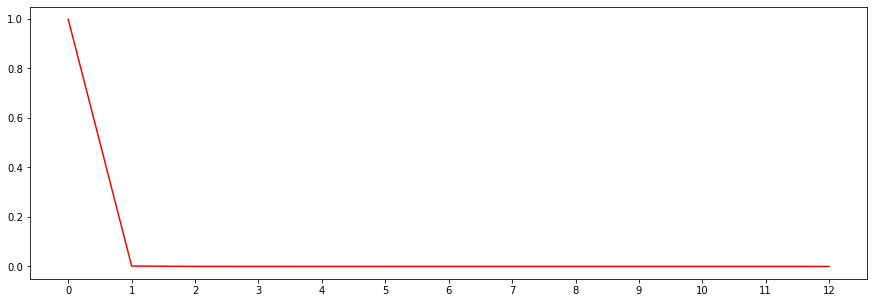

In [14]:
plt.figure(figsize=(15, 5)) # criando um gr√°fico retangular para facilitar a visualiza√ß√£o
plt.plot(pca.explained_variance_ratio_, color='r') # colocando a porcentagem de vari√¢ncia que cada componente nos trouxe
plt.xticks(np.arange(df_wine.shape[1])) # mostrando todos os n√∫meros no eixo x
plt.show() # mostrando o gr√°fico final

Agora, como interpretamos isso? Existe um m√©todo chamado **elbow method** (ou _m√©todo do cotovelo_) que pode ajudar. Basicamente olhamos da esquerda para direita e paramos quando identificamos um "cotovelo" no gr√°fico: isto √©, indo para a direita ver√≠amos que n√£o ter√≠amos mais grandes altera√ß√µes na curva indicando, assim, que haver√≠amos chegado √† quantidade ideal de componentes e n√£o valeria o esfor√ßo selecionarmos mais componentes. Olhando para o gr√°fico acima fica f√°cil: √† direita do **1** no eixo x n√£o vemos uma mudan√ßa no comportamento: logo, os componentes 0 e 1 seriam os mais adequados (em outras palavras, somente 2 componentes).

Por outro lado, o componente 0 parece ser estranhamente relevante em rela√ß√£o aos demais, n√£o √©? Olhando a documenta√ß√£o do scikit-learn sobre o PCA encontramos um item interessante chamado `components_`. Com ele, conseguimos ver a contribui√ß√£o de cada um dos atributos (abaixo representados pelas linhas) sobre os componentes (representados abaixo pelas colunas). Note que no componente **0** temos um valor bem destoante do `flavanoids` em rela√ß√£o aos demais. Isto indicaria que somente esta coluna impactaria muito para detectar o produtor de um vinho. Ser√° que √© _s√≥ isso mesmo_ que influencia? Pensemos em um caso real: ser√° que para tomarmos decis√µes n√£o acabamos olhando para um conjunto de atributos?

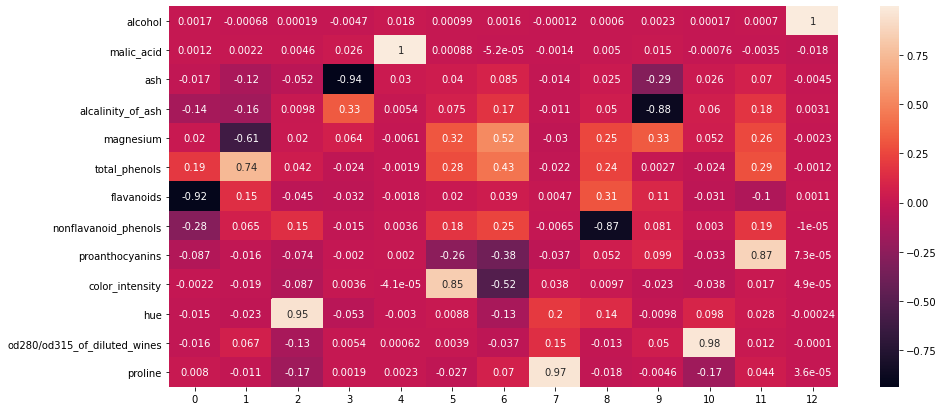

In [15]:
plt.figure(figsize=(15, 7))
sns.heatmap(pd.DataFrame(pca.components_, index=df_wine.columns), annot=True)

Ser√° que n√£o faltaria normalizarmos os dados? Vejamos o mesmo PCA, mas agora com o `df_wine_scaled`:

In [16]:
pca = PCA(n_components=df_wine_scaled.shape[1])
pca.fit(df_wine_scaled)

PCA(n_components=13)

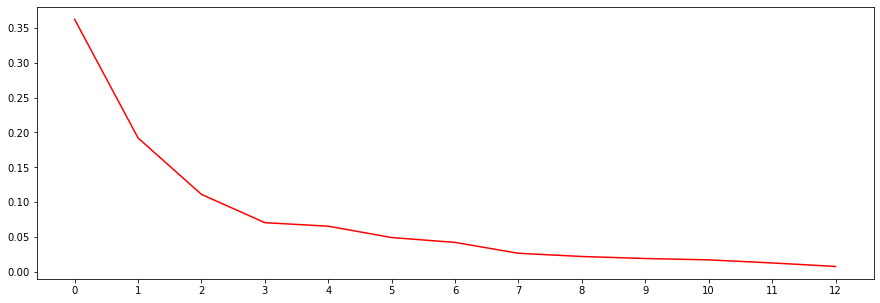

In [17]:
plt.figure(figsize=(15, 5)) # criando um gr√°fico retangular para facilitar a visualiza√ß√£o
plt.plot(pca.explained_variance_ratio_, color='r') # colocando a porcentagem de vari√¢ncia que cada componente nos trouxe
plt.xticks(np.arange(df_wine.shape[1])) # mostrando todos os n√∫meros no eixo x
plt.show() # mostrando o gr√°fico final

Parece mais justo, n√£o √©? Podemos ter um elbow j√° no **3** (ou seja, 4 componentes) ou, ainda, l√° no **7** (ou seja, 8 componentes j√° que a contagem come√ßou no 0 e n√£o no 1). Em casos reais geralmente queremos menos componentes.

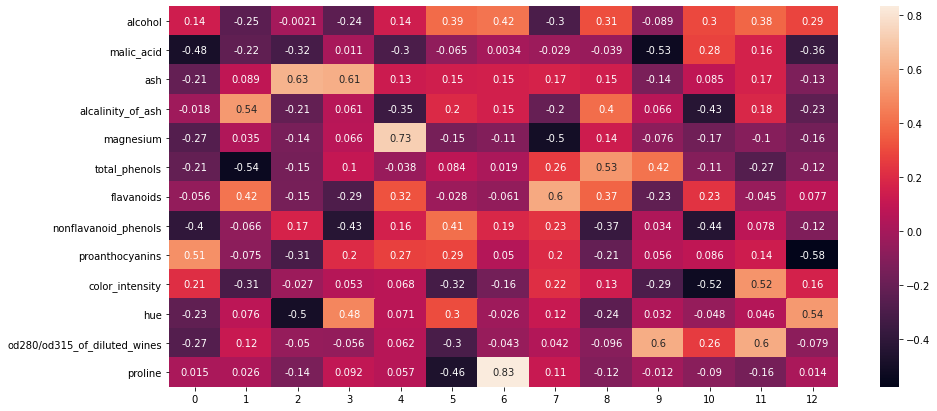

In [18]:
plt.figure(figsize=(15, 7))
sns.heatmap(pd.DataFrame(pca.components_, index=df_wine.columns), annot=True)

Melhor! Veja que no primeiro componente temos uma contribui√ß√£o de fatores liderados pelo `proanthocyanins` e `malic_acid`. J√° no segundo componente, `total_phenols`, `flavanoids`, `alcalinity_of_ash` e, em menor escala, `color_intensity`. J√° no terceiro componente, `ash` e `hue` (de forma antag√¥nica - veja que um √© positivo e outro com sinal negativo). No quarto, `ash`, `hue` e `nonflanavoid_phenols` (agora com `ash` e `hue` com o mesmo sinal). Veja que todas as colunas influenciam em maior ou menor grau nos componentes.

De forma geral, √© poss√≠vel darmos um nome para os componentes de acordo com as colunas que mais trazem impacto e a rela√ß√£o entre elas: olhemos o componente **7**: os `flavanoids`, `magnesium` e `alcohol` trazem os maiores impactos. Os `flavanoids` s√£o respons√°veis (pelo que pesquisei rapidamente no Google) pela cor v√≠vida nos alimentos e bebidas; `magnesium` √© um metal importante para o nosso corpo e √© presente no vinho; e o `alcohol` √© a porcentagem de √°lcool na bebida. Aqui, vemos que um vinho com um alto n√∫mero neste componente seria provavelmente um vinho de cor v√≠vida (pela alta influ√™ncia dos `flavanoids` e por ter sinal positivo), com baixo teor alco√≥lico e n√≠veis de magn√©sio (visto pelo sinal negativo, mas alta representatividade destes valores). Logo, quem sabe n√£o poder√≠amos renomear este componente **7** para **cor_vivida_baixo_alcool_e_manganes**? Sim, n√£o √© um nome nada inspirado - mas creio que conseguiu captar a ideia.

Finalmente, caso tenha interesse em ver o resultado final do PCA: observe como ficaria abaixo a tabela gerada com **4** componentes escolhidos.

In [19]:
pca = PCA(n_components=4)
pd.DataFrame(pca.fit_transform(df_wine_scaled))

0         1         2         3
0    3.316751 -1.443463 -0.165739 -0.215631
1    2.209465  0.333393 -2.026457 -0.291358
2    2.516740 -1.031151  0.982819  0.724902
3    3.757066 -2.756372 -0.176192  0.567983
4    1.008908 -0.869831  2.026688 -0.409766
..        ...       ...       ...       ...
173 -3.370524 -2.216289 -0.342570  1.058527
174 -2.601956 -1.757229  0.207581  0.349496
175 -2.677839 -2.760899 -0.940942  0.312035
176 -2.387017 -2.297347 -0.550696 -0.688285
177 -3.208758 -2.768920  1.013914  0.596903

[178 rows x 4 columns]

Al√©m disso, vamos mostrar de forma gr√°fica como o PCA pode ajudar (e outras t√©cnicas de sele√ß√£o de atributos tamb√©m). O `pairplot` √© uma visualiza√ß√£o a qual compara todos os atributos contra todos os atributos. Como nosso c√©rebro visualiza at√© 3 dimens√µes, para vermos mais do que isso precisamos recorrer para t√©cnicas como esta. Veja que cada bolinha representa um produtor diferente. Note, ainda, que para algumas colunas conseguimos ver que h√° uma *certa* divis√£o entre os diferentes produtores, mas em outras fica dif√≠cil de fazermos esta separa√ß√£o.

Ora, se at√© para n√≥s humanos √© dif√≠cil de nos acharmos aqui com a _consci√™ncia_ de que estamos analisando vinhos, imagine ent√£o como seria para um algoritmo:

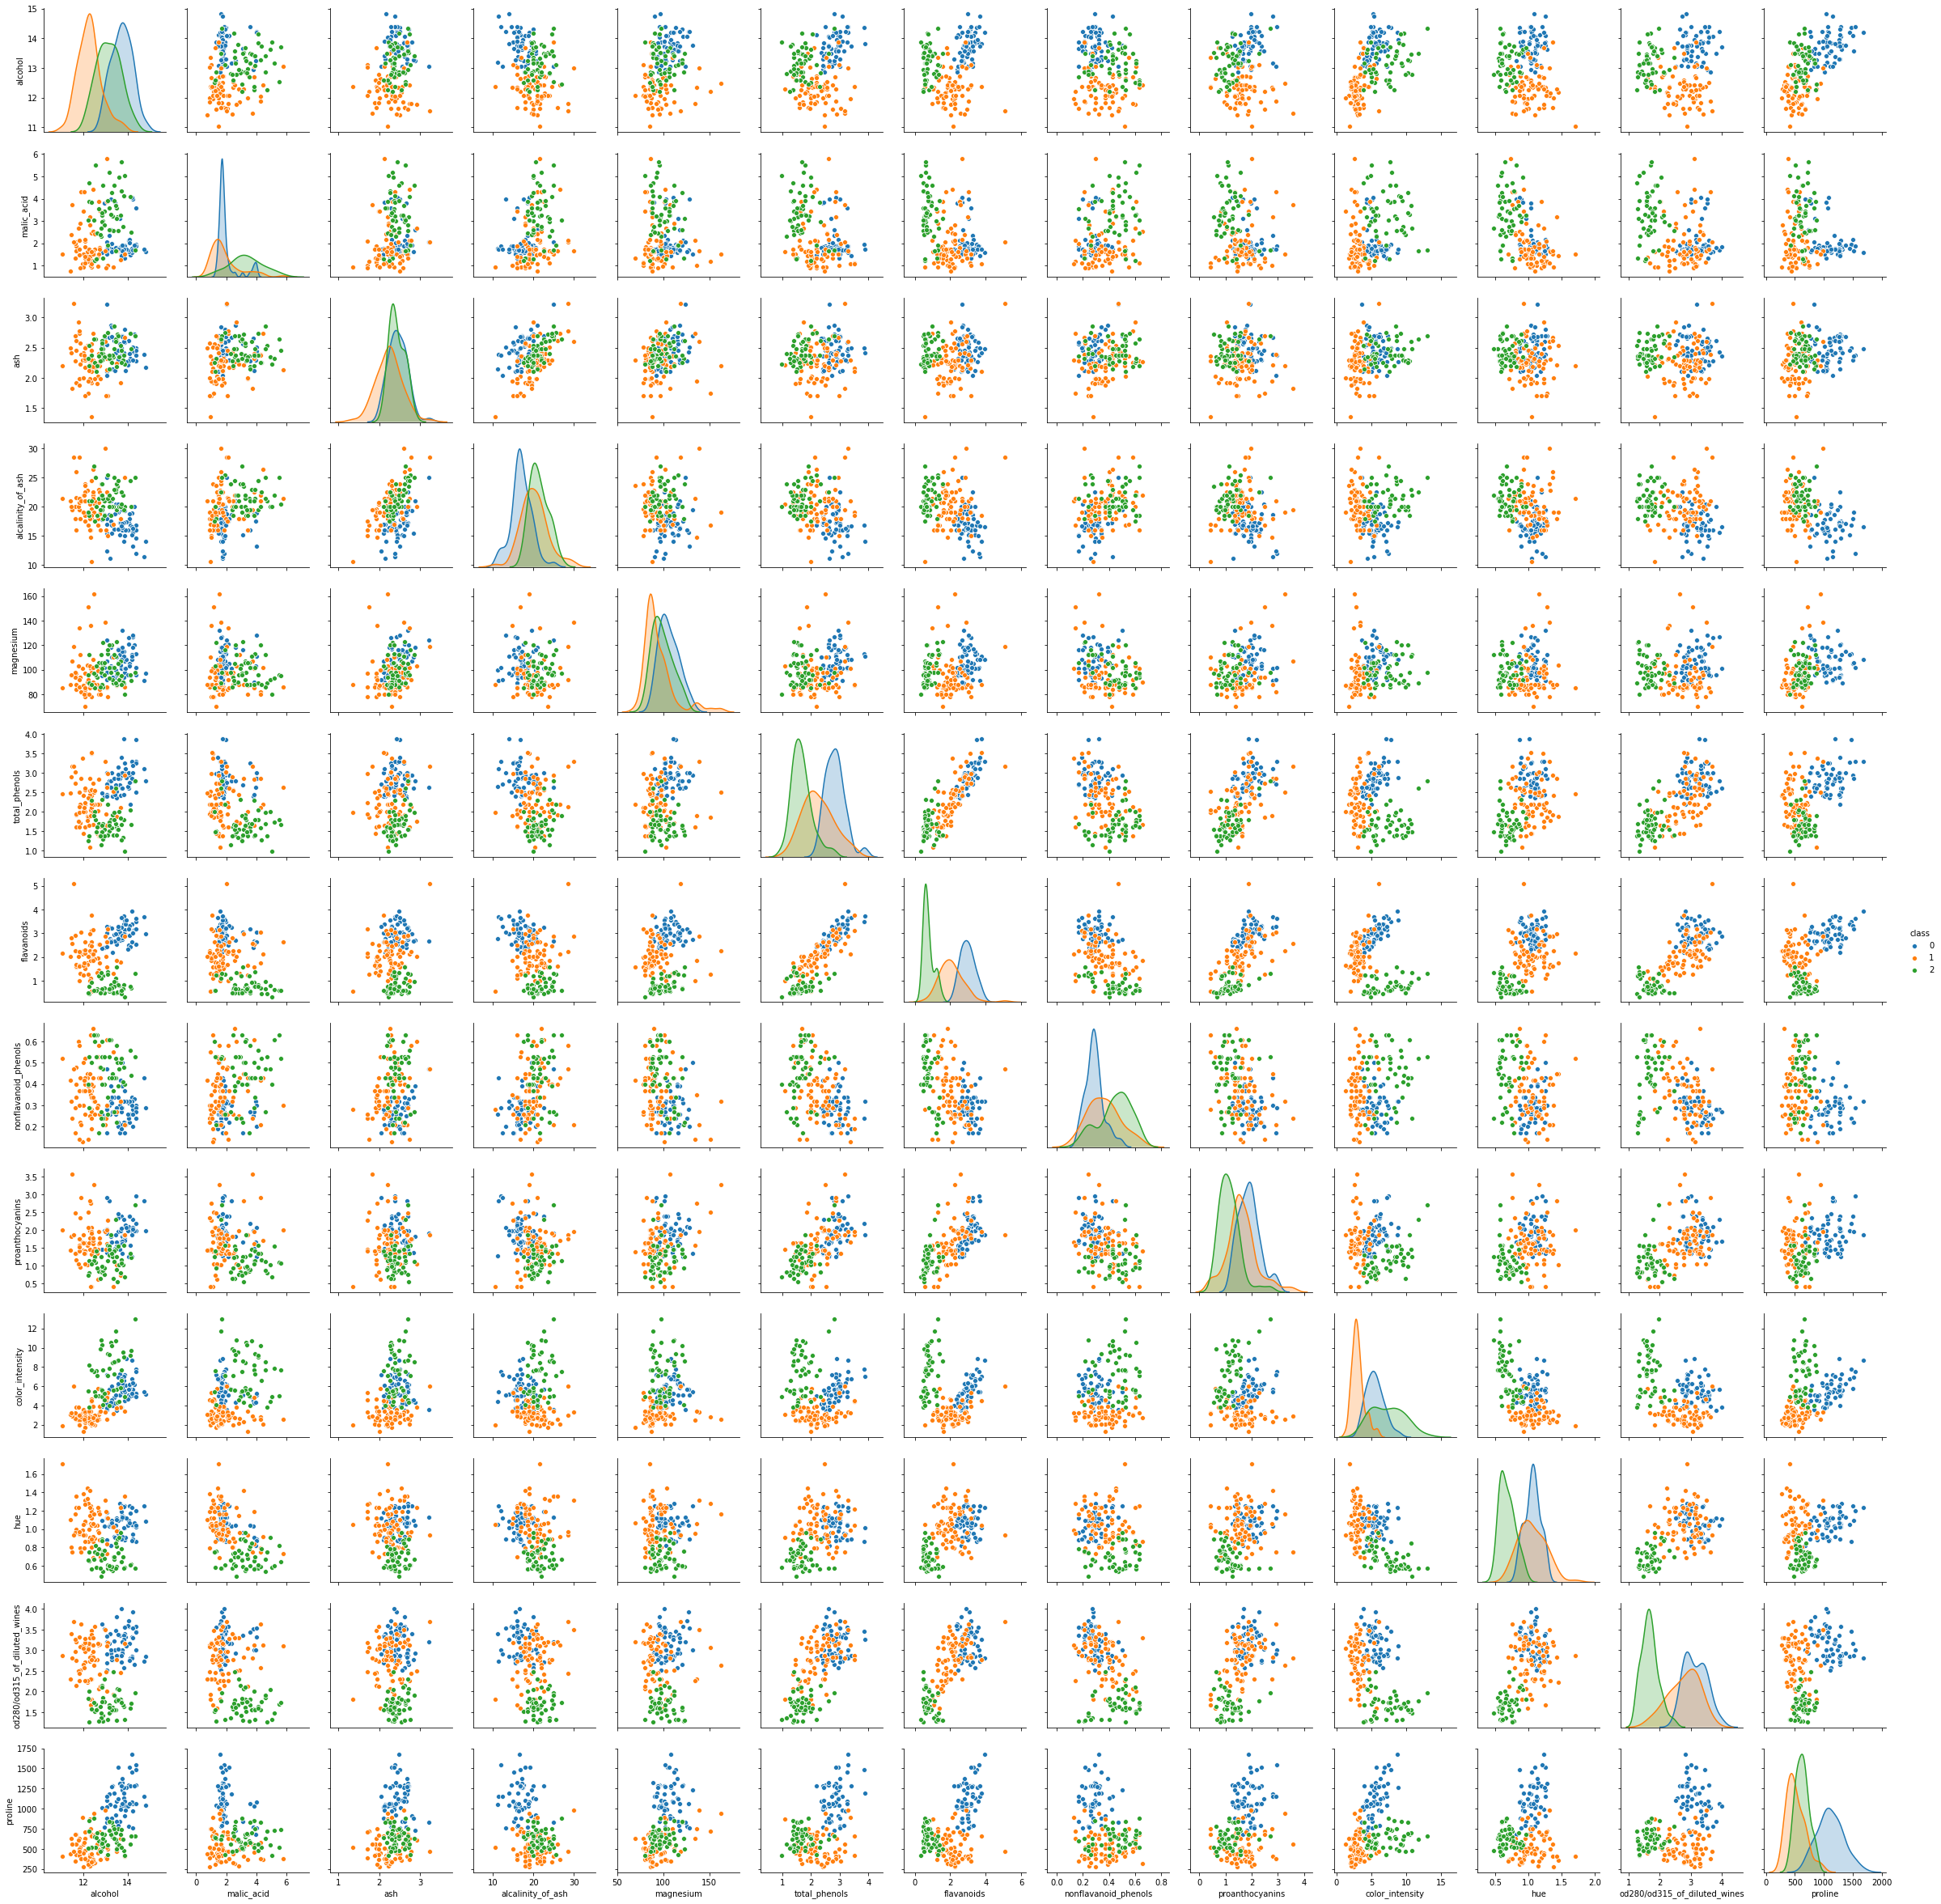

In [20]:
df_wine_plot = df_wine.copy() # criando uma c√≥pia do df_wine para fins de visualiza√ß√£o
df_wine_plot['class'] = target_wine # colocando os produtores dentro desta c√≥pia para podermos separ√°-los no gr√°fico
sns.pairplot(df_wine_plot, hue='class') # criando o pairplot e dividindo por cor de produtor

Agora olhe para o mesmo `pairplot`, agora com o PCA aplicado. Tire as suas pr√≥prias conclus√µes. ü§ê

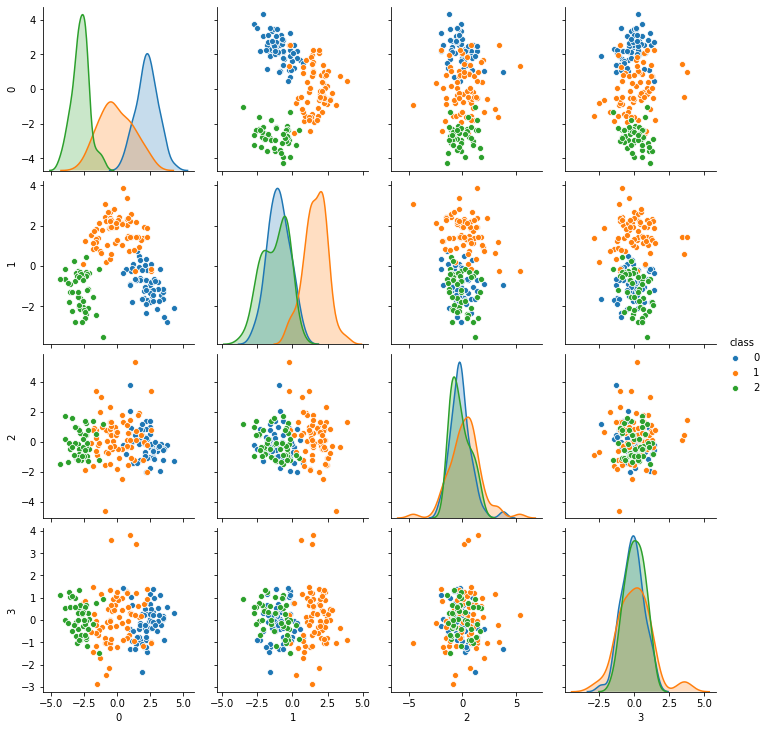

In [21]:
df_pca_resultado = pd.DataFrame(pca.fit_transform(df_wine_scaled))
df_pca_resultado['class'] = target_wine
sns.pairplot(df_pca_resultado, hue='class')

## Agrupamento
### KMeans e MiniBatchKMeans

O KMeans √© a t√©cnica mais conhecida de agrupamento (lembrando que agora estamos falando de agrupar **inst√¢ncias**, e n√£o **atributos**). Neste caso e de forma similar ao que j√° fizemos anteriormente, aplicaremos o KMeans para o `df_wine`. Note que ele agrupa todos os dados dispon√≠veis para a sua an√°lise: logo, n√£o √© legal colocarmos uma classe/label no meio desta an√°lise.

Al√©m disso, o `MiniBatchKMeans` √© efetivamente o `KMeans` para grandes bases de dados. Logo, nos concentraremos somente no `KMeans`. Note que ele possui um par√¢metro chamado `random_state`: ele √© o que chamamos tamb√©m de _seed_: um c√≥digo aleat√≥rio que define um ponto de partida aleat√≥rio. Aqui, deixamos um valor fixo para que toda execu√ß√£o tenha o mesmo resultado, n√£o importando de qual computador fa√ßamos os testes.

Finalmente, para fins de visualiza√ß√£o (lembra que o `sns.pairplot` com todas as colunas ficou gigante, certo?) estaremos j√° aplicando o `SelectKBest` para reduzir a quantidade de colunas sendo analisadas e colocadas em gr√°fico. Note tamb√©m que estamos usando o `df_wine_scaled` como base da an√°lise ao inv√©s do `df_wine`: isto se d√° porque precisamos que eles tenham uma mesma escala num√©rica.

In [22]:
sel = SelectKBest(k=5)
df_wine_kbest = pd.DataFrame(sel.fit_transform(df_wine_scaled, target_wine), columns=df_wine.columns[sel.get_support()])

'Resultados do KMeans com k=1'

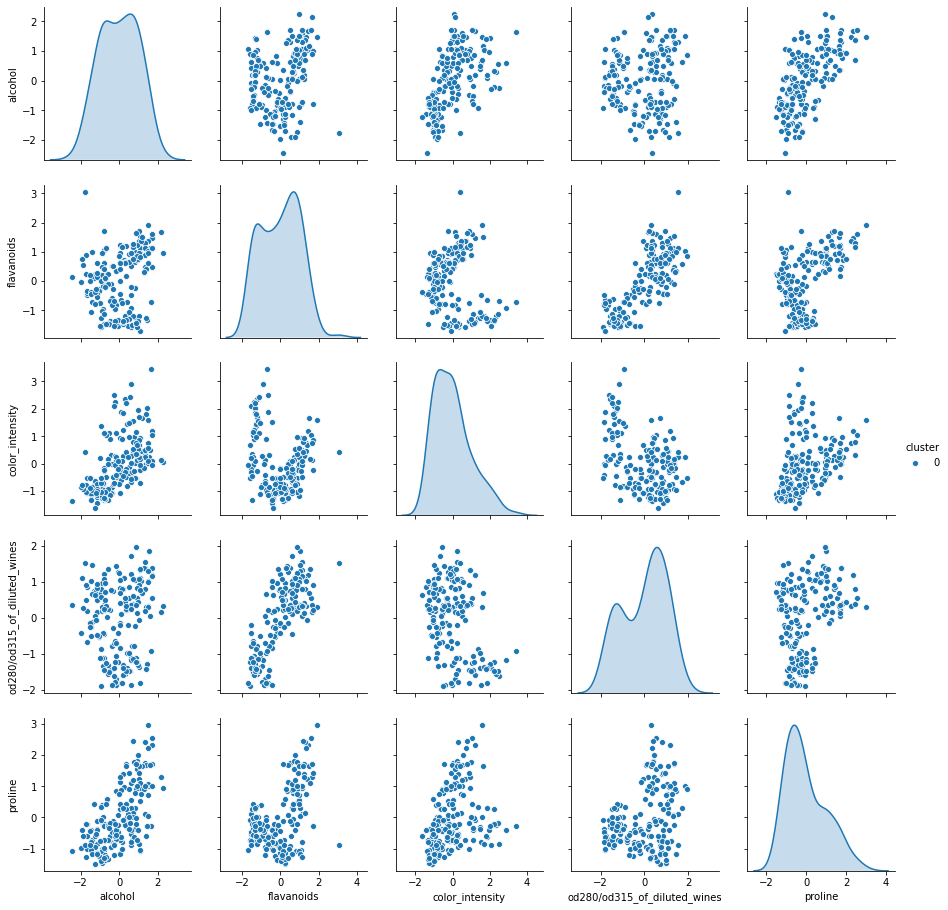

'Resultados do KMeans com k=2'

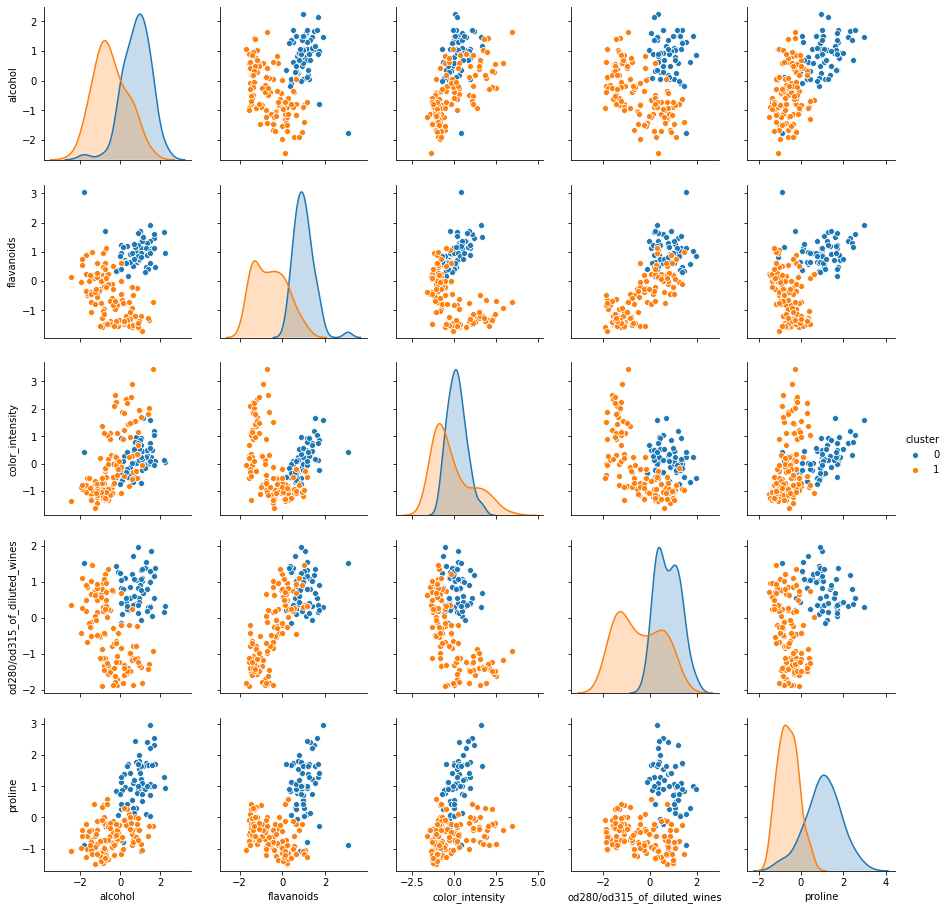

'Resultados do KMeans com k=3'

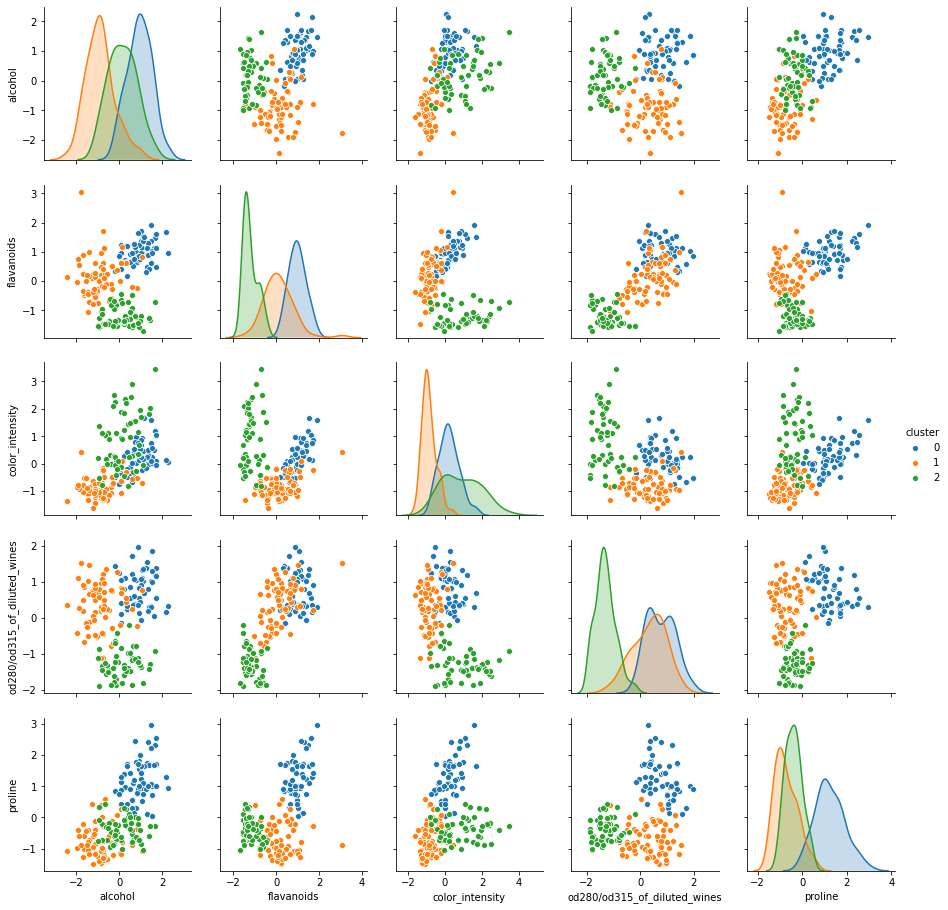

'Resultados do KMeans com k=4'

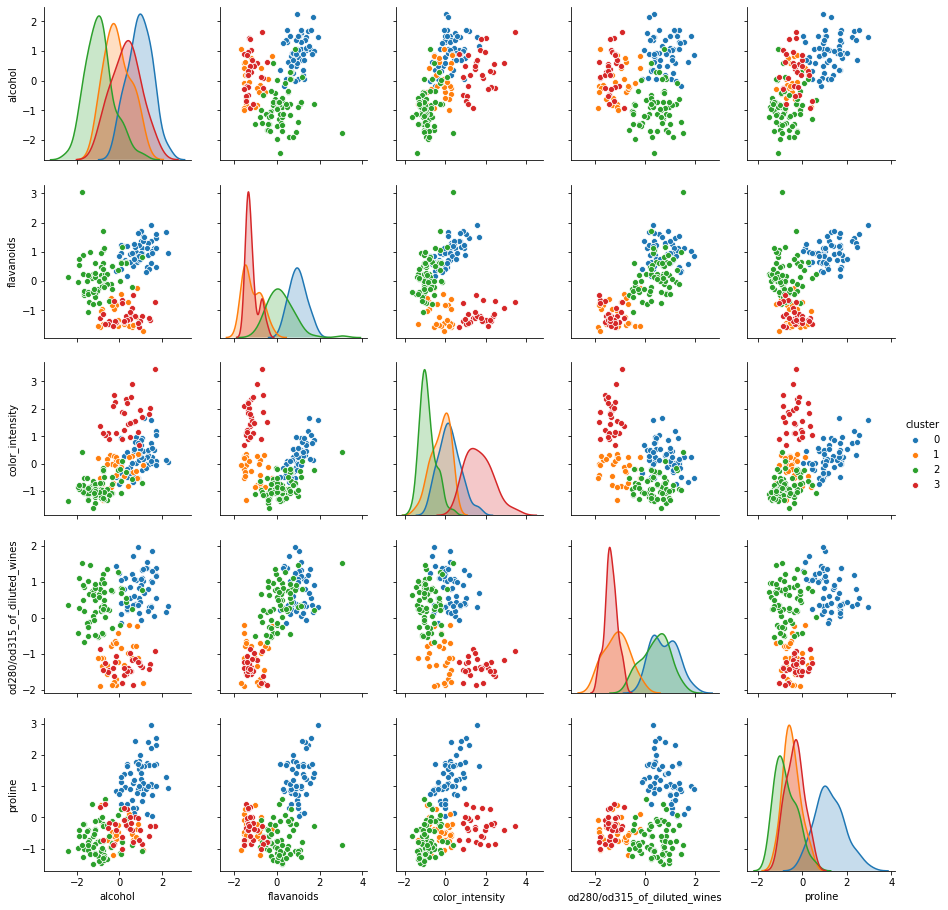

In [23]:
for i in range(1, 5):
    display(f'Resultados do KMeans com k={i}')
    df_wine_kmeans = df_wine_kbest.copy()
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_wine_kmeans)
    df_wine_kmeans['cluster'] = kmeans.predict(df_wine_kmeans)

    sns.pairplot(df_wine_kmeans, hue='cluster')
    plt.show()

### DBSCAN

O DBSCAN busca primeiramente encontrar exemplos que est√£o bem juntos/unidos/colados e, a partir da√≠, come√ßa a encontrar os seus _vizinhos_. Ao contr√°rio do KMeans, n√£o requer um n√∫mero de grupos/clusters. Todos os elementos que segundo ele n√£o seriam membros de um cluster em espec√≠fico ficariam dentro do cluster **-1**.

In [ ]:
df_wine_dbscan = df_wine_kbest.copy()
df_wine_dbscan['cluster'] = DBSCAN().fit_predict(df_wine_dbscan)

sns.pairplot(df_wine_dbscan, hue='cluster')
plt.show()

### OPTICS

O OPTICS √© similar ao DBSCAN, mas pode levar a um agrupamento diferente uma vez que gera um c√°lculo que pode acabar por penalizar alguns elementos que n√£o possuem tantos exemplos similares. Todos os elementos que segundo ele n√£o seriam membros de um cluster em espec√≠fico ficariam dentro do cluster **-1**.

In [ ]:
df_wine_optics = df_wine_kbest.copy()
df_wine_optics['cluster'] = OPTICS().fit_predict(df_wine_optics)

sns.pairplot(df_wine_optics, hue='cluster')
plt.show()